In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf

from matplotlib import pyplot as plt

In [2]:
from matplotlib import font_manager

font_dirs = ['/Users/saadesa/Downloads/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'CMU Sans Serif'

In [3]:
xls = pd.ExcelFile('../microstructures.xlsx')

column_list = ['generation', 'individual', 'comp_mean', 'M_surf_c', 'M_bulk_c', 'v', 'Microstructure']
dtype_dict = {}
for column in column_list[:-1]:
    dtype_dict[column] = float
    
dtype_dict['Microstructure'] = str

lcm_runs = pd.read_excel(xls, 'LCM', dtype=dtype_dict)
npcm_runs = pd.read_excel(xls, 'NPCM', dtype=dtype_dict)
rcm_runs = pd.read_excel(xls, 'RCM', dtype=dtype_dict)
vcm_runs = pd.read_excel(xls, 'VCM', dtype=dtype_dict)
vcm1_runs = pd.read_excel(xls, 'VCM_1', dtype=dtype_dict)
lcm_50_50_runs = pd.read_excel(xls, 'LCM_50_50', dtype=dtype_dict)
rcm_50_50_runs = pd.read_excel(xls, 'RCM_50_50', dtype=dtype_dict)
vcm_50_50_runs = pd.read_excel(xls, 'VCM_50_50', dtype=dtype_dict)

In [4]:
colors = {'NPCMF': '#D17D08', 'NPCMC': '#D14208', 'NPCMM': '#BA5202', 'Mixed': 'gray',
          'RCM': '#FFCE0D', 'NA': 'gray', 'LCM': '#130C6E', 'VCM': '#178222', 'LCM+VCM': '#21A8DE', 
          'VCM+LCM': '#27C2B5', 'VCM+RCM': '#A7BA29', 
          'LCM+NPCM': '#BD1E96', 'VCM+NPCM': '#C2BA88', 'RCM+NPCM': '#C28C25'}

In [5]:
for idx, run in enumerate([lcm_runs, npcm_runs, rcm_runs, vcm_runs, vcm1_runs, lcm_50_50_runs, rcm_50_50_runs, vcm_50_50_runs]):
    df = run[column_list]
    df['M'] = df['M_surf_c'] + df['M_bulk_c']
    df['c0'] = 0.5*( 1 + erf( -df['comp_mean']/(np.sqrt(2)*0.35) ) )
    df['D'] = df['v']/( df['M'] * (1 - 3*df['c0']**2)**(3/2) )
    df['color'] = df['Microstructure']
    df['color'] = df['color'].map(colors)
    
    df_mirror = df.copy()
    df_mirror['c0'] = 1 - df['c0']
    df_merge = pd.concat([df, df_mirror])
    
    if (idx == 0):
        lcm_df = df_merge
    elif (idx == 1):
        npcm_df = df_merge
    elif (idx == 2):
        rcm_df = df_merge
    elif (idx == 3):
        vcm_df = df_merge
    elif (idx == 4):
        vcm1_df = df_merge
    elif (idx == 5):
        lcm_50_50_df = df_merge
    elif (idx == 6):
        rcm_50_50_df = df_merge
    elif (idx == 7):
        vcm_50_50_df = df_merge  

<ipython-input-5-1b70232ac219>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M'] = df['M_surf_c'] + df['M_bulk_c']
<ipython-input-5-1b70232ac219>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c0'] = 0.5*( 1 + erf( -df['comp_mean']/(np.sqrt(2)*0.35) ) )
<ipython-input-5-1b70232ac219>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

<IPython.core.display.Javascript object>


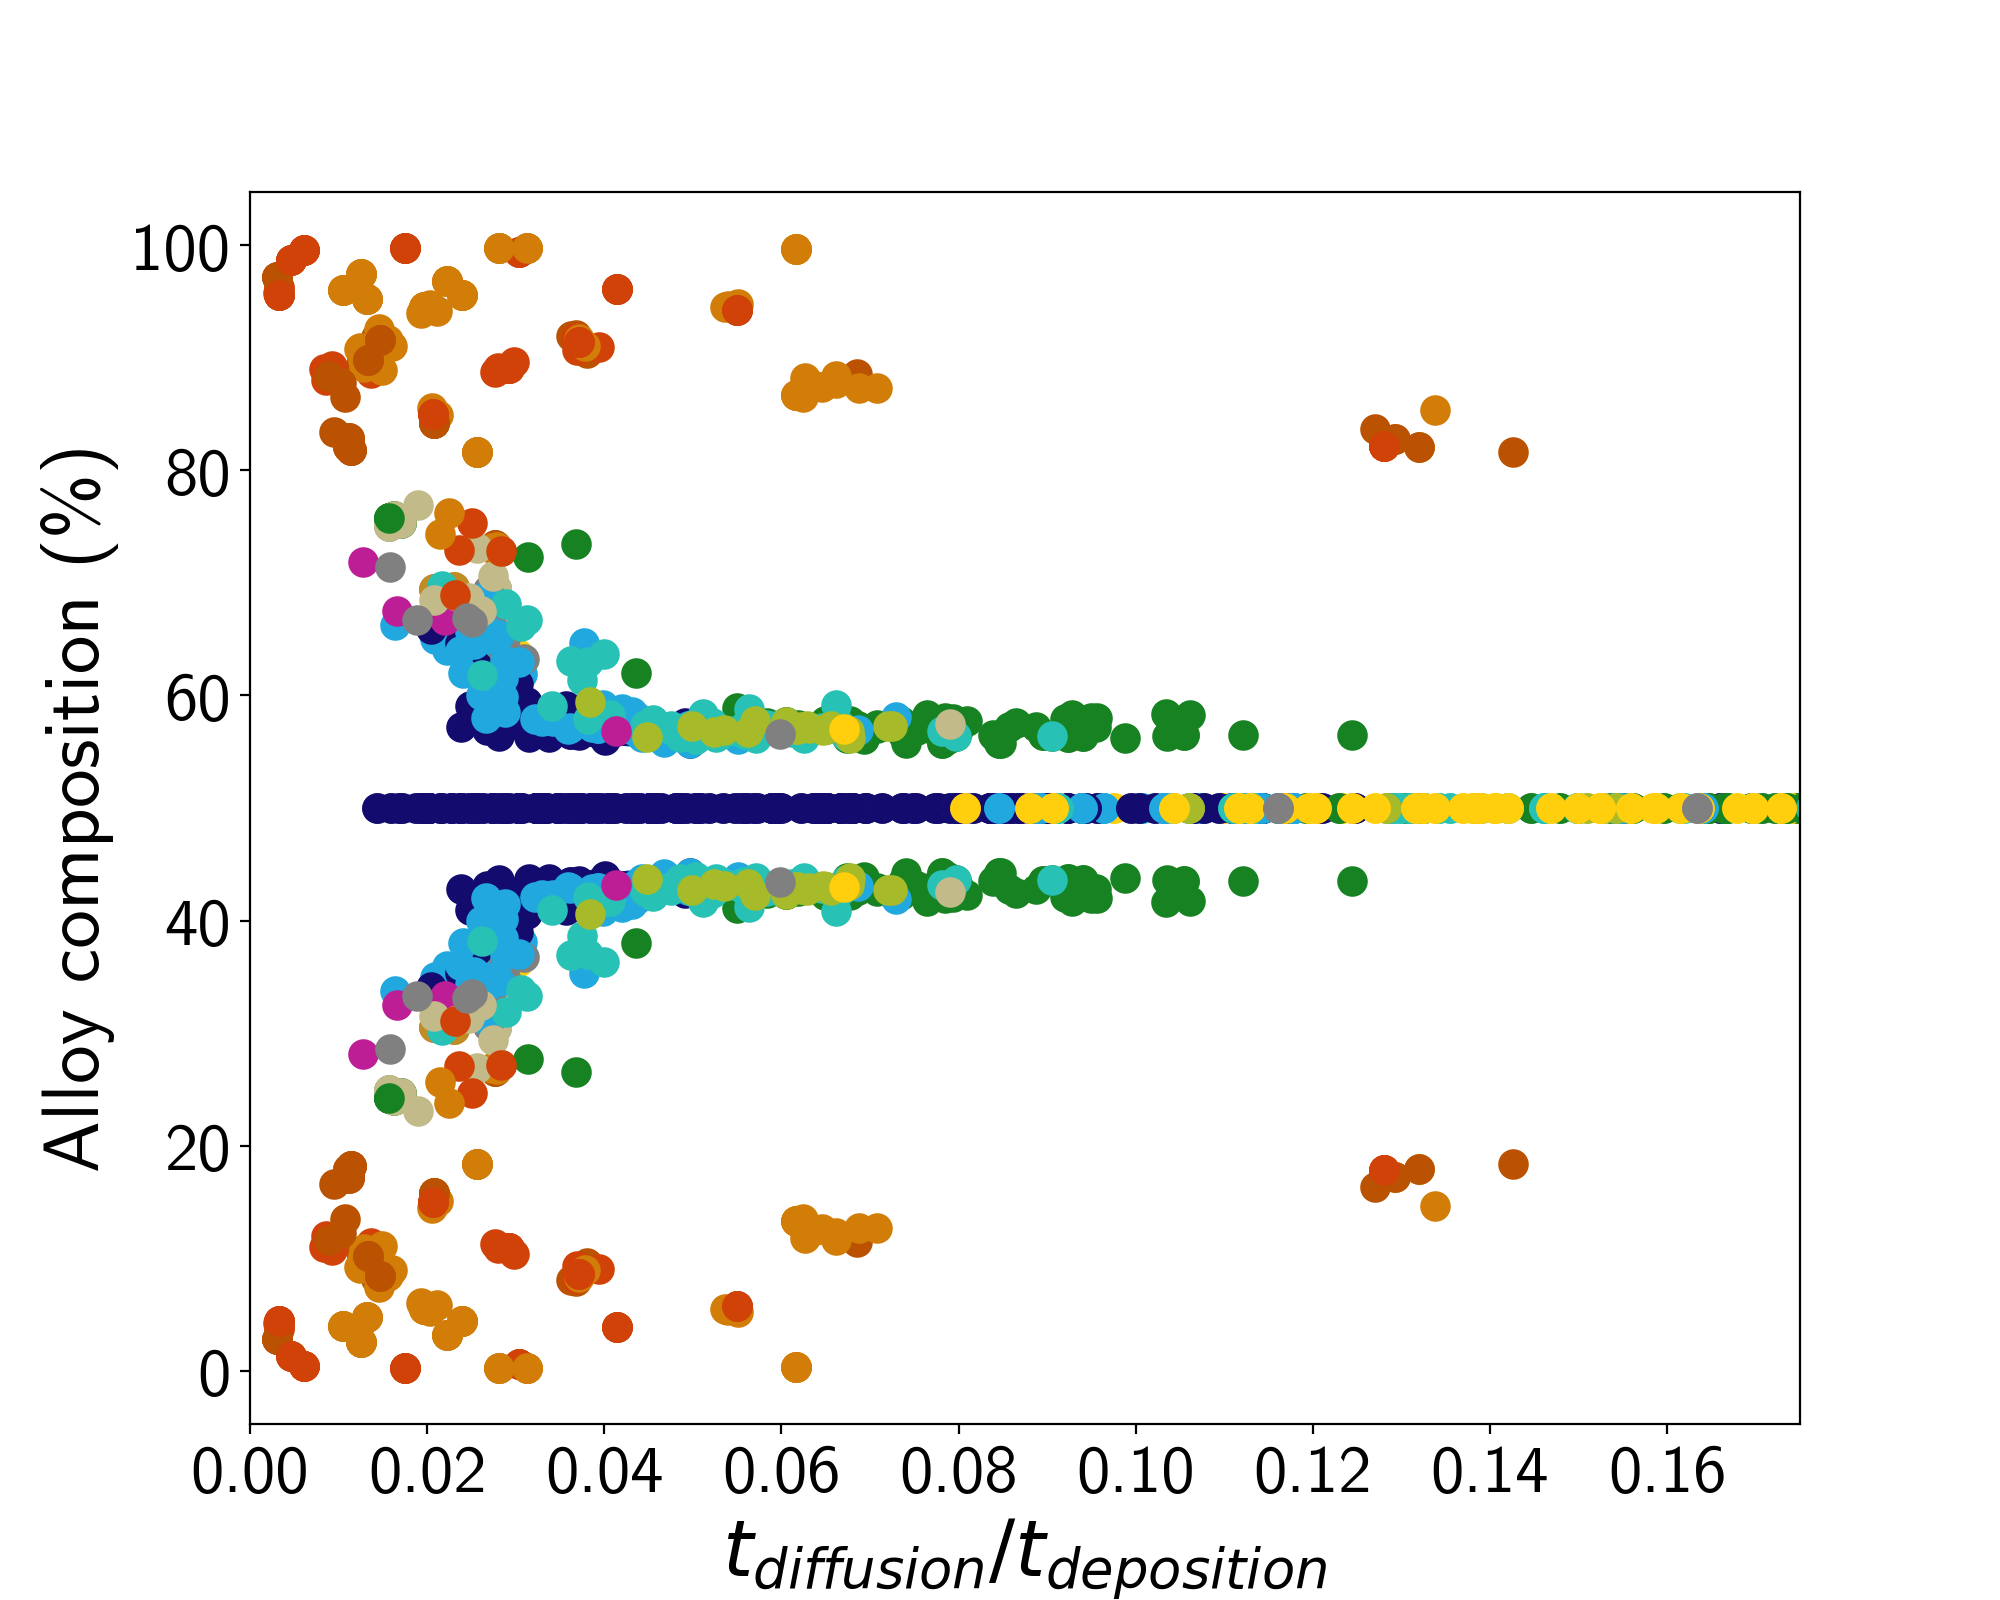

In [6]:
%matplotlib notebook

plt.figure(figsize=(10, 8))
plt.xlim((0, 0.175))
plt.ylabel("Alloy composition (%)", fontsize=28)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.xlabel(r"$t_{diffusion}/t_{deposition}$", fontsize=28)
for df in [lcm_df, npcm_df, rcm_df, vcm_df, vcm1_df, lcm_50_50_df, rcm_50_50_df, vcm_50_50_df]:
    for name, group in df.groupby('color'):
        plt.scatter(group['D'], group['c0']*100, marker='o', c=name, s=100)
        #D = np.array(group['D'])
        #c0 = np.array(group['c0'])
        #points = np.vstack((D, c0)).T
        #print (points.shape)
        #if (points.shape[0] > 2):
        #    hull = ConvexHull(points)
        #    # get x and y coordinates
        #    # repeat last point to close the polygon
        #    x_hull = np.append(points[hull.vertices,0], points[hull.vertices,0][0])
        #    y_hull = np.append(points[hull.vertices,1], points[hull.vertices,1][0])
        #    print (x_hull.shape)
        #    plt.fill(x_hull, y_hull, alpha=0.3, c=name)